In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [31]:
df = pd.read_csv("cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [32]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [34]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [37]:
df.duplicated().sum()

172

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.duplicated().sum()


0

In [40]:
##balance
loyal_cust=df[df["Customer Type"]=="Loyal Customer"]
disloyal_cust=df[df["Customer Type"]=="disloyal Customer"]

In [41]:
loyal_cust = loyal_cust.sample(21000)
loyal_cust.shape


(21000, 12)

In [42]:
disloyal_cust.shape

(18905, 12)

In [43]:
balance_df = pd.concat([loyal_cust, disloyal_cust],axis = 0 )
balance_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
30816,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,56,1504,2,2,2,0,5.0
57615,Female,Loyal Customer,Business travel,Business,satisfied,53,408,5,5,4,0,0.0
17031,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,45,762,3,5,3,108,90.0
73383,Female,Loyal Customer,Business travel,Business,satisfied,45,101,5,5,4,0,0.0
17564,Female,Loyal Customer,Business travel,Business,satisfied,41,3027,5,5,5,0,0.0


In [44]:
cat_col= balance_df.select_dtypes(include="O")
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
30816,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
57615,Female,Loyal Customer,Business travel,Business,satisfied
17031,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
73383,Female,Loyal Customer,Business travel,Business,satisfied
17564,Female,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [45]:
num_col = balance_df.select_dtypes(exclude="O")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
30816,56,1504,2,2,2,0,5.0
57615,53,408,5,5,4,0,0.0
17031,45,762,3,5,3,108,90.0
73383,45,101,5,5,4,0,0.0
17564,41,3027,5,5,5,0,0.0


In [46]:
##One hot 
##label encoding 

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in cat_col.columns:
#     balance_df[col] = le.fit_transform(balance_df[col])
# balance_df.head()


In [59]:
#one hot 

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

oh = OneHotEncoder(drop='if_binary')

cat_col_encoded = oh.fit_transform(cat_col).toarray()

cat_col_encoded 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [60]:
# pd.get_dummies(cat_col).astype("int")

In [61]:
column_name = list(oh.get_feature_names_out())

column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [62]:
one_hot = pd.DataFrame(cat_col_encoded, columns=column_name)
one_hot

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
39900,0.0,1.0,0.0,1.0,0.0,0.0,0.0
39901,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39902,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39903,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [63]:
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,56,1504,2,2,2,0,5.0
1,53,408,5,5,4,0,0.0
2,45,762,3,5,3,108,90.0
3,45,101,5,5,4,0,0.0
4,41,3027,5,5,5,0,0.0
...,...,...,...,...,...,...,...
39900,37,596,3,3,3,110,121.0
39901,24,1055,1,5,1,13,10.0
39902,23,192,2,4,2,3,0.0
39903,30,1995,4,4,4,7,14.0


In [64]:
final_df = pd.concat([one_hot,num_col],axis=1)
final_df

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56,1504,2,2,2,0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,53,408,5,5,4,0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,45,762,3,5,3,108,90.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,45,101,5,5,4,0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,41,3027,5,5,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39900,0.0,1.0,0.0,1.0,0.0,0.0,0.0,37,596,3,3,3,110,121.0
39901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24,1055,1,5,1,13,10.0
39902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23,192,2,4,2,3,0.0
39903,1.0,1.0,0.0,1.0,0.0,0.0,0.0,30,1995,4,4,4,7,14.0


In [65]:
num_col.reset_index(drop= True,inplace=True)

In [66]:
final_df

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56,1504,2,2,2,0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,53,408,5,5,4,0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,45,762,3,5,3,108,90.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,45,101,5,5,4,0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,41,3027,5,5,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39900,0.0,1.0,0.0,1.0,0.0,0.0,0.0,37,596,3,3,3,110,121.0
39901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24,1055,1,5,1,13,10.0
39902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23,192,2,4,2,3,0.0
39903,1.0,1.0,0.0,1.0,0.0,0.0,0.0,30,1995,4,4,4,7,14.0


In [67]:
final_df.to_csv("cust_sat_cleaned.csv",index = False)

In [68]:
x = final_df.drop("Customer Type_disloyal Customer",axis=1)
y = final_df[["Customer Type_disloyal Customer"]]

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)



c:\Users\jaikr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jaikr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
lr.score(x_train,y_train)

0.8635509334669841

In [72]:
lr.score(x_test,y_test)

0.8643027189575241

In [73]:
##steps to be taken for increase the acc of model 
#1 data cleaning 
#2 amount of data increase 
#3 


In [74]:
y_test

,Customer Type_disloyal Customer
21485,1.0
37296,1.0
5288,0.0
13852,0.0
19949,0.0
...,...
16801,0.0
23455,1.0
18114,0.0
25405,1.0


In [75]:
x_test

,Gender_Male,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
21485,0.0,0.0,0.0,1.0,0.0,0.0,8,849,4,3,4,39,29.0
37296,0.0,0.0,0.0,1.0,0.0,0.0,22,576,4,3,4,0,0.0
5288,1.0,0.0,0.0,1.0,0.0,0.0,26,1670,3,4,3,7,15.0
13852,0.0,0.0,0.0,1.0,0.0,0.0,63,478,1,1,1,0,9.0
19949,0.0,0.0,1.0,0.0,0.0,1.0,35,2438,3,3,4,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16801,0.0,1.0,0.0,1.0,0.0,0.0,26,1147,5,5,2,154,139.0
23455,0.0,0.0,0.0,1.0,0.0,1.0,44,190,2,2,2,56,58.0
18114,0.0,0.0,1.0,0.0,0.0,1.0,51,277,4,4,3,0,0.0
25405,0.0,0.0,1.0,0.0,0.0,1.0,40,228,4,5,4,30,3.0


In [76]:
pred = lr.predict(x_test)
y_test["predictions"] = pred 
y_test

##1 = loyal 
## = disloyal 

,Customer Type_disloyal Customer,predictions
21485,1.0,1.0
37296,1.0,1.0
5288,0.0,1.0
13852,0.0,0.0
19949,0.0,0.0
...,...,...
16801,0.0,0.0
23455,1.0,0.0
18114,0.0,0.0
25405,1.0,1.0


In [77]:
## model evaluation -- classification 

y_test["Customer Type_disloyal Customer"].value_counts()

Customer Type_disloyal Customer
0.0    4217
1.0    3764
Name: count, dtype: int64

In [78]:
y_test["predictions"].value_counts()

predictions
0.0    4232
1.0    3749
Name: count, dtype: int64

In [81]:
### confusion matrix

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test["Customer Type_disloyal Customer"],y_test["predictions"])
conf_mat




array([[3683,  534],
       [ 549, 3215]], dtype=int64)

<Axes: >

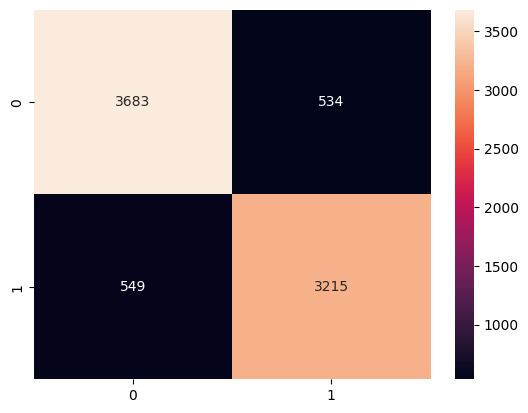

In [82]:
sns.heatmap(conf_mat, annot=True, fmt='g')

In [83]:
## classification report 

from sklearn.metrics import classification_report

print(classification_report(y_test["Customer Type_disloyal Customer"],y_test["predictions"]))

#f1 score = 2*(precision*recall)/(precision+recall)


              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      4217
         1.0       0.86      0.85      0.86      3764

    accuracy                           0.86      7981
   macro avg       0.86      0.86      0.86      7981
weighted avg       0.86      0.86      0.86      7981

